In [45]:
# -*- coding: utf-8 -*-
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## TWO PARAMETER MONTHLY WATER BALANCE MODEL (Xiong,1994)

The model is made based on the formula to calculate the actual annual evapotranspiration of a catchment (Brutsaert,1992):

$E(t)\ =\ EP(t)*tanh[P(t)/EP(t)]\ \ \ (1)$

where: 

- $E(t)$, annual evapotranspiration

- $EP$, annual pan evaporation

- $P(t)$, annual rainfall

- $tanh$, hyperbolic tangent function

For monthly runoff:

$E(t)\ =\ c*EP(t)*tanh[P(t)/EP(t)]\ \ \ (2)$

$Q(t)\ =\ S(t)*tanh[s(t)/SC]\ \ \ (3)$

- $Q(t)$, monthly runoff

- $S(t)$, water content of soil

And the model parameters 

- $SC$, Field capacity of the catchment, second parameter [mm]
- $c$ Used to take an account of the effect of the change of time scale, i.e. from year to month, on the relationship expressed by Eq. (1).


$Q(t)\ =\ [S(t-1)\ +\ P(t)\ -\ E(t)*tanh{[S(t-1)]\ +\ P(t)\ -\ E(t)]/SC} \ \ \ (4)$

For the water conservation law

$S(t)\ =\ S(t-1)\ +\ P(t)\ -\ E(t)\ -\ Q(t) \ \ \ (5)$



In [14]:
def Xiong(EP,P,c,SC,Area,So=1700):
    '''MONTHLY WATER BALANCE MODEL
    INPUTS:
    EP = Pan evaporation, array-like, mm/month
    P = Monthly rainfall, array-like, mm/month
    Area = Catchment area, float, m^2
    So = Initial water content in soil - initial condition for the model,float,mm/month
    MODEL PARAMETERS
    c = Change of time scale parameter
    SC = Field Capacity in the catchment,float,mm
    OUTPUTS
    Q = Simulated runoff,list-like,m^3/s
    '''
    EP=EP*Area*3.858*10**(-4.0)
    P =Area*P*3.858*10**(-4.0)
    S=[So] # Water storage
    Q=[]
    for i in range(len(P)):
        Ei = c*EP[i]*np.tanh(P[i]/EP[i]) # Evapotranspiration
        Qi =(S[-1]+P[i]-Ei)*np.tanh((S[-1]+P[i]-Ei)/SC)
        Q.append(Qi)
        S.append(S[-1]+P[i]-Ei-Qi)
    return Q

In [42]:
df = pd.read_csv('Example_Data.csv',index_col=0)
df.index = df.index.to_datetime()

In [43]:
P = df['P'].values # monthly rainfall
EP = df['EP'].values # monthly pan evaporation - Cenicafe Method
Qo = df['Qo'].values # monthly measured runoff

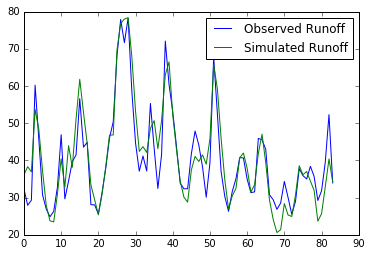

In [44]:
Qs = Xiong(EP,P,8.71259,1800,862.69,So=1650)
%matplotlib inline
plt.plot((Qo[66:150]+10.),label='Observed Runoff')
plt.plot(Qs[66:150],label='Simulated Runoff')
plt.legend(loc='best')
plt.show()

## REFERENCES

Makhlouf, Z., & Michel, C. (1994). A two-parameter monthly water balance model for French watersheds. Journal of Hydrology, 162(3), 299-318.